In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import re
import kaggle
from sklearn import preprocessing

In [53]:
import os
for dirname, _, filenames in os.walk('/Users/astrid_cyj/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/astrid_cyj/kaggle/.DS_Store
/Users/astrid_cyj/kaggle/titanic/titanic_lessdommies.ipynb
/Users/astrid_cyj/kaggle/titanic/test.csv
/Users/astrid_cyj/kaggle/titanic/titanic-predict.ipynb
/Users/astrid_cyj/kaggle/titanic/Titanic_predict_YijieCao.csv
/Users/astrid_cyj/kaggle/titanic/train.csv
/Users/astrid_cyj/kaggle/titanic/gender_submission.csv
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/titanic_lessdommies-checkpoint.ipynb
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/titanic-predict-checkpoint.ipynb
/Users/astrid_cyj/kaggle/titanic/.ipynb_checkpoints/Titanic_predict_YijieCao-checkpoint.csv
/Users/astrid_cyj/kaggle/.ipynb_checkpoints/titanic-predict-checkpoint.ipynb


# Load data and primary analysis

In [54]:
df_train = pd.read_csv("/Users/astrid_cyj/kaggle/titanic/train.csv")
df_test = pd.read_csv("/Users/astrid_cyj/kaggle/titanic/test.csv")

display(df_train.head())
display(df_test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
#check dataset's information
display(df_train.info())
display(df_test.info())

# colimn with missing data: 
# Train dataset: Age, Cabin, Embarked
# Test dataset: Age, Fare, Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


None

In [56]:
# Since Cabin column missed too much data, it cannot be an important feature for future prediction
# Drop 'Cabin' column in both dataset
df_train = df_train.drop(['Cabin'], axis=1)
df_test = df_test.drop(['Cabin'], axis=1)

In [57]:
display(df_train.describe(include=['O']))
display(df_train.describe())
display(df_test.describe(include=['O']))
display(df_test.describe())

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Braund, Mr. Owen Harris",male,347082,S
freq,1,577,7,644


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,Name,Sex,Ticket,Embarked
count,418,418,418,418
unique,418,2,363,3
top,"Kelly, Mr. James",male,PC 17608,S
freq,1,266,5,270


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# EDA

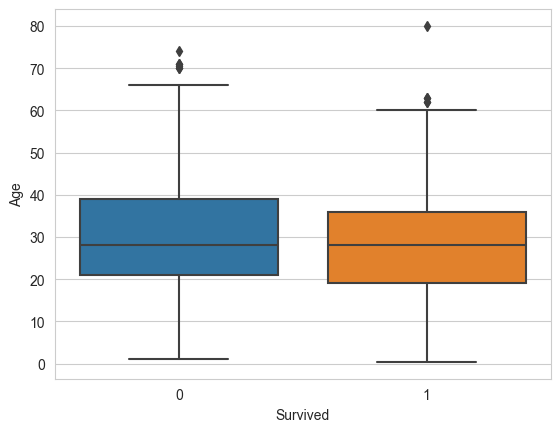

In [58]:
# example plot for passengers' age and whether they were survived
fig = sns.boxplot(data = df_train, x= "Survived", y="Age")

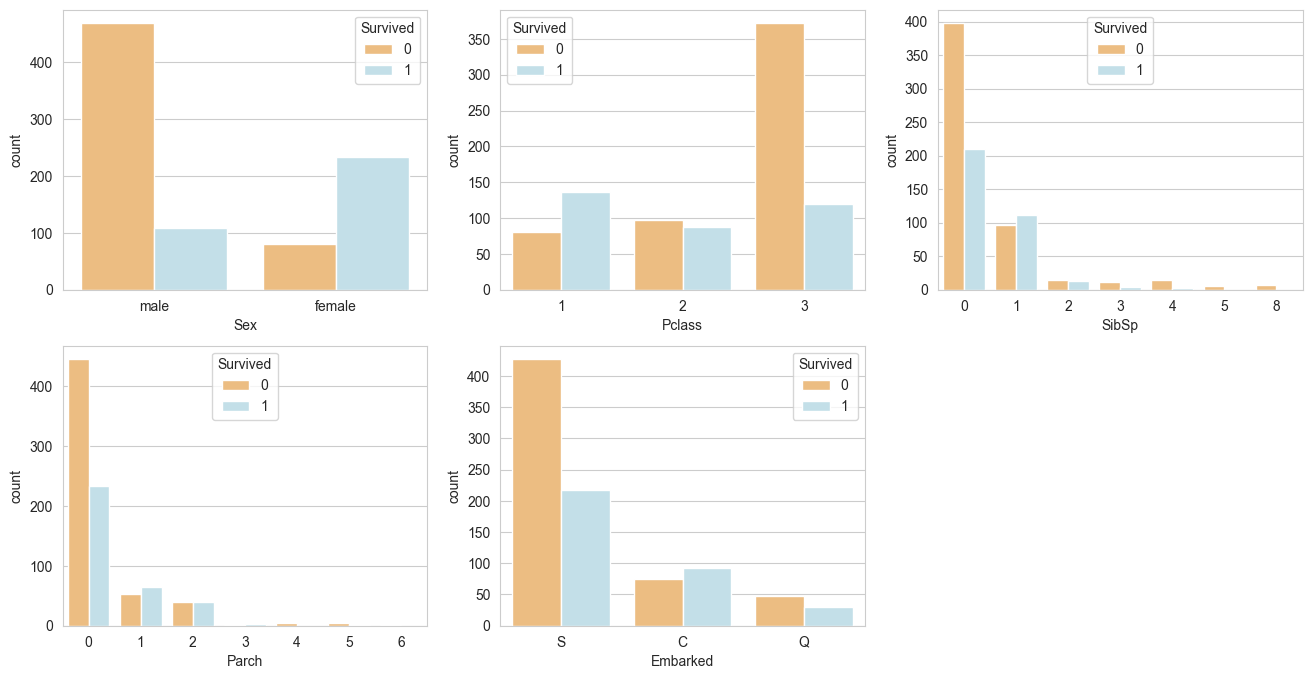

In [59]:
# To evaluate categorical data
cat_list = ['Sex','Pclass','SibSp','Parch','Embarked']
fig = plt.figure(figsize = (16,8))

for i in range(len(cat_list)):
    column = cat_list[i]
    sub = fig.add_subplot(2,3,i + 1)
    chart = sns.countplot(data = df_train, x = column, hue = "Survived", palette = "RdYlBu" )
    
# According to the following charts, 'Sex', 'Pclass' and 'Embarked' are important features
# 'SibSp' and 'Parch' need to be further processed

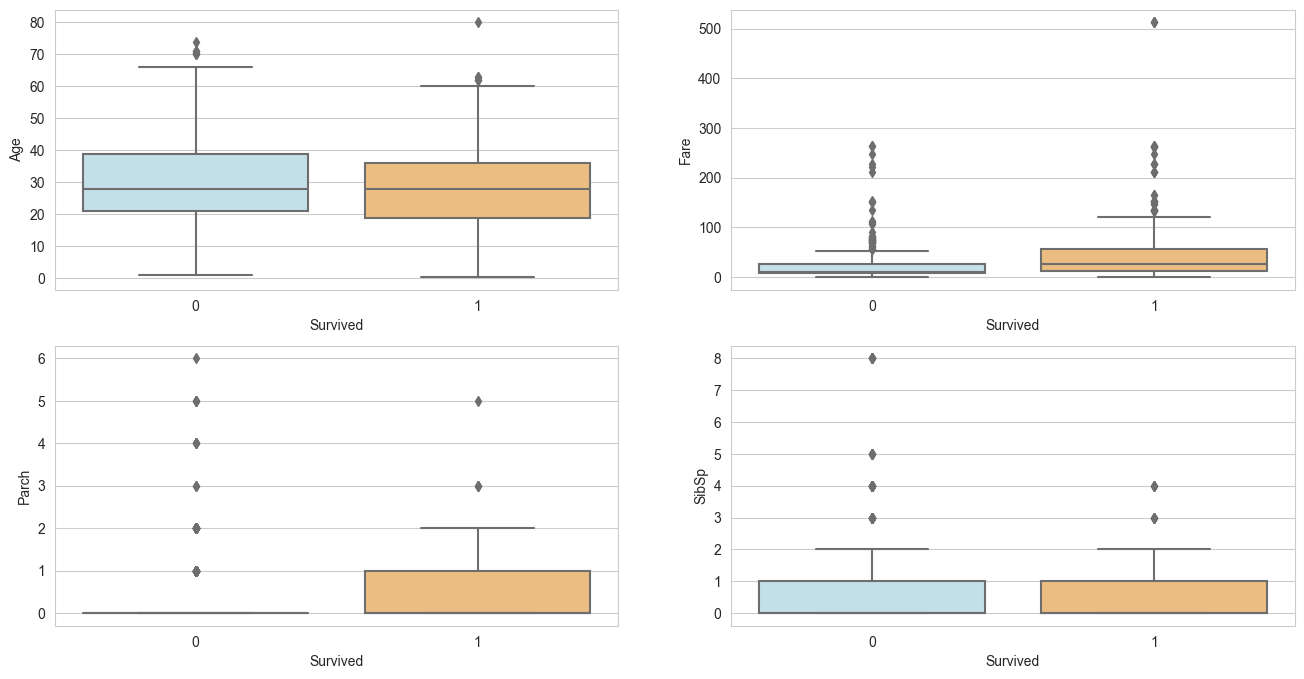

In [60]:
# To evaluate numerical data

num_list = ["Age", "Fare", "Parch", "SibSp"]
fig = plt.figure(figsize = (16,8))

for i in range(len(num_list)):
    column = num_list[i]
    sub = fig.add_subplot(2,2,i + 1)
    chart = sns.boxplot(data = df_train, x = "Survived", y = column, palette = "RdYlBu_r" )
    
# According to following charts, 'Fare' has distinct difference between 'Survived' or not survived
# however, the distribution of 'Age' is not so obvioius as it should be in our common sence

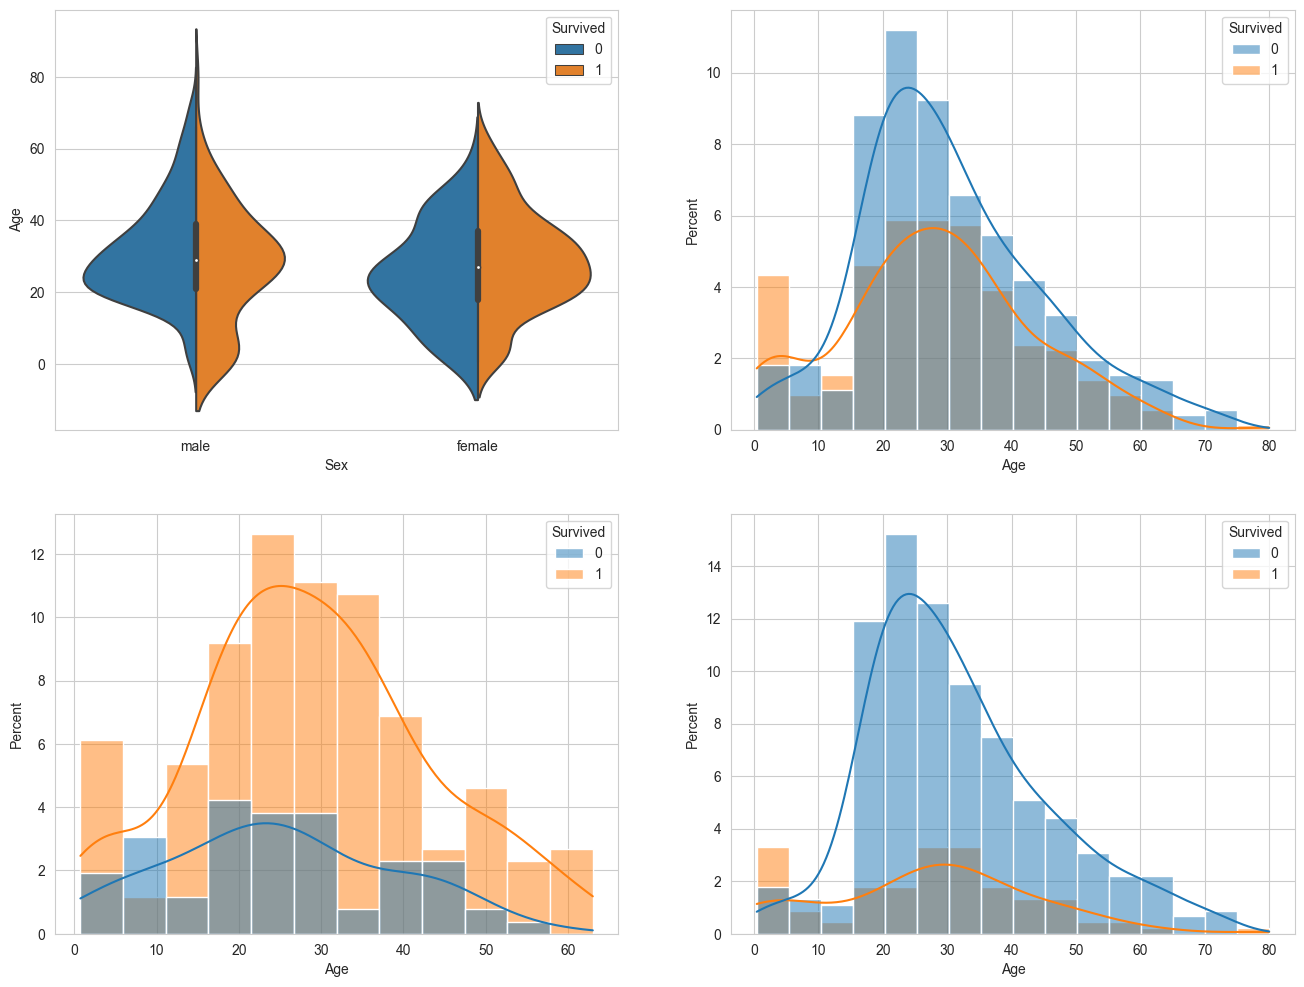

In [61]:
fig = plt.figure(figsize = (16,12))

# chart 1: survived distribution for male and female
sub = fig.add_subplot(2,2,1)
chart = sns.violinplot(data=df_train, x="Sex", y="Age", hue="Survived", split=True)

# chart 2: survived distribution for all ages
sub = fig.add_subplot(2,2,2)
chart = sns.histplot(data=df_train, x="Age", hue="Survived",kde=True, bins=16,stat='percent')

# chart 3: survived distribution for female
sub = fig.add_subplot(2,2,3)
chart = sns.histplot(data=df_train[df_train["Sex"]=="female"], x="Age", hue="Survived",kde=True, bins=12,stat='percent')

# chart 4: survived distribution for male
sub = fig.add_subplot(2,2,4)
chart = sns.histplot(data=df_train[df_train["Sex"]=="male"], x="Age", hue="Survived",kde=True, bins=16, stat='percent')
plt.show()

# for people's age roughly < 15, the survival rate is the highest
# people's age roughly locates in (15,30), survival rate is the lowest
# as the result, we will devide the age column into several groups in future analysis


# Extract title

In [62]:
# extract title

df_train["Title"] = df_train["Name"].str.extract(r'([A-Za-z]+)\.')
df_test["Title"] = df_test["Name"].str.extract(r'([A-Za-z]+)\.')
display(df_train.Title.value_counts())
display('---'*10)
# check if there is missing title
display(df_train.Title.isnull().value_counts())
display('---'*10)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

'------------------------------'

False    891
Name: Title, dtype: int64

'------------------------------'

In [63]:
# clean title
data = [df_train, df_test]

for df in data:
    df['Title'] = df['Title'].replace(['Countess', 'Col', \
                                            'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Other')
    df['Title'] = df['Title'].replace(['Mlle','Ms'], 'Miss')
    df['Title'] = df['Title'].replace(['Capt','Sir'], 'Mr')
    df['Title'] = df['Title'].replace(['Lady','Mme'], 'Mrs')
    
display(df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())
display(df_train['Title'].value_counts()) 
display(df_test['Title'].value_counts())


,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.157996
3,Mrs,0.795276
4,Other,0.300000


Mr        519
Miss      185
Mrs       127
Master     40
Other      20
Name: Title, dtype: int64

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

# Fill missing Age and data process

In [64]:
# Fill age data with mean

display(df_train.groupby('Title')['Age'].mean())


Title
Master     4.574167
Miss      21.845638
Mr        32.503750
Mrs       35.900000
Other     43.947368
Name: Age, dtype: float64

In [65]:
for df in data:
    df.loc[(df.Title=='Mr')&(df.Age.isnull()), 'Age'] = 32.503
    df.loc[(df.Title=='Master')&(df.Age.isnull()), 'Age'] = 4.574
    df.loc[(df.Title=='Miss')&(df.Age.isnull()), 'Age'] = 21.845
    df.loc[(df.Title=='Mrs')&(df.Age.isnull()), 'Age'] = 35.900
    df.loc[(df.Title=='Other')&(df.Age.isnull()), 'Age'] = 43.947

In [66]:
# Group age data

df_train["AgeRange"] = pd.cut(df_train['Age'], bins=5)
df_train["AgeRange"].value_counts()

(16.336, 32.252]    382
(32.252, 48.168]    325
(0.34, 16.336]      104
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: AgeRange, dtype: int64

In [67]:
for df in data:
    df.loc[df['Age']<=16, 'AgeGroup'] = 1
    df.loc[(df['Age']>16) & (df['Age']<=32), 'AgeGroup'] = 2
    df.loc[(df['Age']>32) & (df['Age']<=48), 'AgeGroup'] = 3
    df.loc[(df['Age']>48) & (df['Age']<=64), 'AgeGroup'] = 4
    df.loc[(df['Age']>64) & (df['Age']<=80), 'AgeGroup'] = 5
    display(df.head())
    display(df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(16.336, 32.252]",2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(32.252, 48.168]",3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(16.336, 32.252]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(32.252, 48.168]",3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(32.252, 48.168]",3.0


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
AgeRange       0
AgeGroup       0
dtype: int64

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,3.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,4.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,2.0


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
Title          0
AgeGroup       0
dtype: int64

# Fill missing Embarked data

In [68]:
df_train[df_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,AgeGroup
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss,"(32.252, 48.168]",3.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs,"(48.168, 64.084]",4.0


In [69]:
display(df_train.groupby(['Sex','Pclass','Embarked'])['Fare'].mean())
# According to the following results and their 80 pounds fare,
# They were likely on board in Q nad S.
display(df_train.groupby(['Sex','Pclass'])['Embarked'].value_counts())
# However, only one person boarded in Q, these two lady were most likely boarded Titanic in Southampton
# (If you search their names on the internet, they did boarded in Southampton)

Sex     Pclass  Embarked
female  1       C           115.640309
                Q            90.000000
                S            99.026910
        2       C            25.268457
                Q            12.350000
                S            21.912687
        3       C            14.694926
                Q            10.307833
                S            18.670077
male    1       C            93.536707
                Q            90.000000
                S            52.949947
        2       C            25.421250
                Q            12.350000
                S            19.232474
        3       C             9.352237
                Q            11.924251
                S            13.307149
Name: Fare, dtype: float64

Sex     Pclass  Embarked
female  1       S            48
                C            43
                Q             1
        2       S            67
                C             7
                Q             2
        3       S            88
                Q            33
                C            23
male    1       S            79
                C            42
                Q             1
        2       S            97
                C            10
                Q             1
        3       S           265
                C            43
                Q            39
Name: Embarked, dtype: int64

In [70]:
df_train['Embarked'].fillna('S',inplace=True)
df_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
AgeRange       0
AgeGroup       0
dtype: int64

# Fill missing Fare data in test dataset

In [71]:
df_test[df_test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,Mr,4.0


In [72]:
# find the average fare for the same kind passenger as Storey Thomas in train dataset
df_train[(df_train['Pclass']==3) & (df_train['Sex']=='male') & (df_train['Embarked']=='S') & \
        (df_train['SibSp']==0) & (df_train['Parch']==0)].groupby('AgeGroup')['Fare'].mean()

AgeGroup
1.0     8.518340
2.0     9.988243
3.0    10.137058
4.0     6.555213
5.0     7.775000
Name: Fare, dtype: float64

In [73]:
# find the average fare for the same kind passenger as Storey Thomas in test dataset
df_test[(df_test['Pclass']==3) & (df_test['Sex']=='male') & (df_test['Embarked']=='S') & \
        (df_test['SibSp']==0) & (df_test['Parch']==0)].groupby('AgeGroup')['Fare'].mean()
# empty data for such a passenger

AgeGroup
1.0    9.225000
2.0    8.665695
3.0    9.690587
4.0         NaN
Name: Fare, dtype: float64

In [74]:
# fill the fare with mean
df_test['Fare'].fillna(df_train[(df_train['Pclass']==3) & (df_train['Sex']=='male') & (df_train['Embarked']=='S') & \
        (df_train['SibSp']==0) & (df_train['Parch']==0) & (df_train['AgeGroup']==4)]['Fare'].mean(), inplace=True)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
AgeGroup       0
dtype: int64

## Fare further process

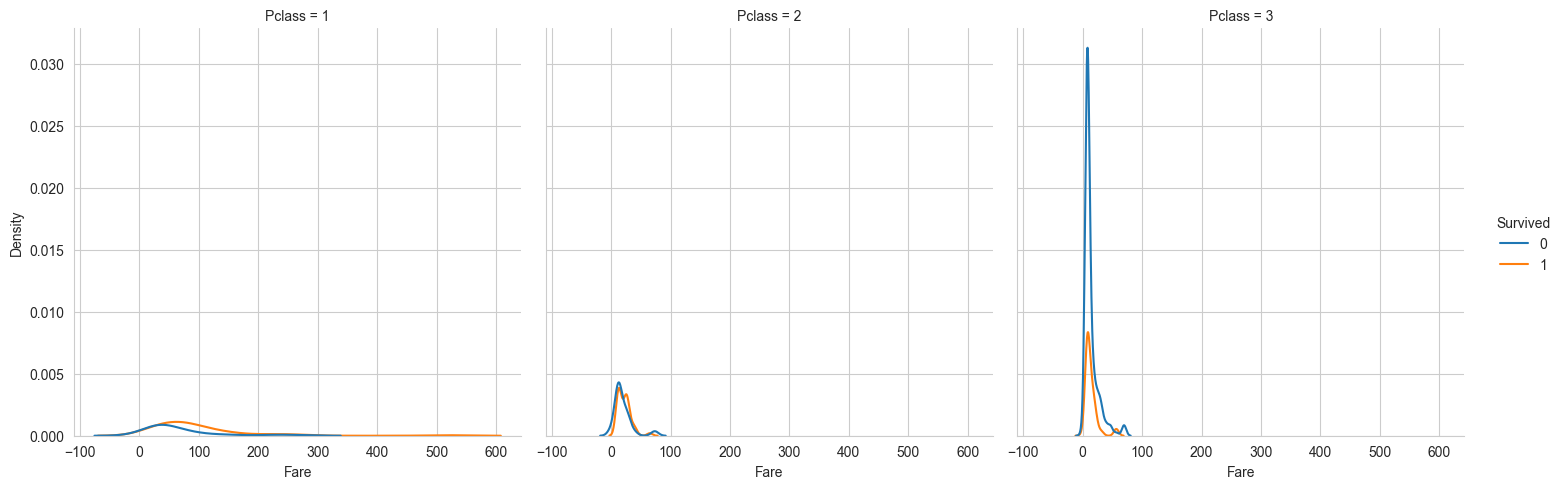

In [75]:
sns.displot(data=df_train, x="Fare", kind="kde", hue='Survived',col='Pclass')
# obviously, the majority of passengers were 3rd Class

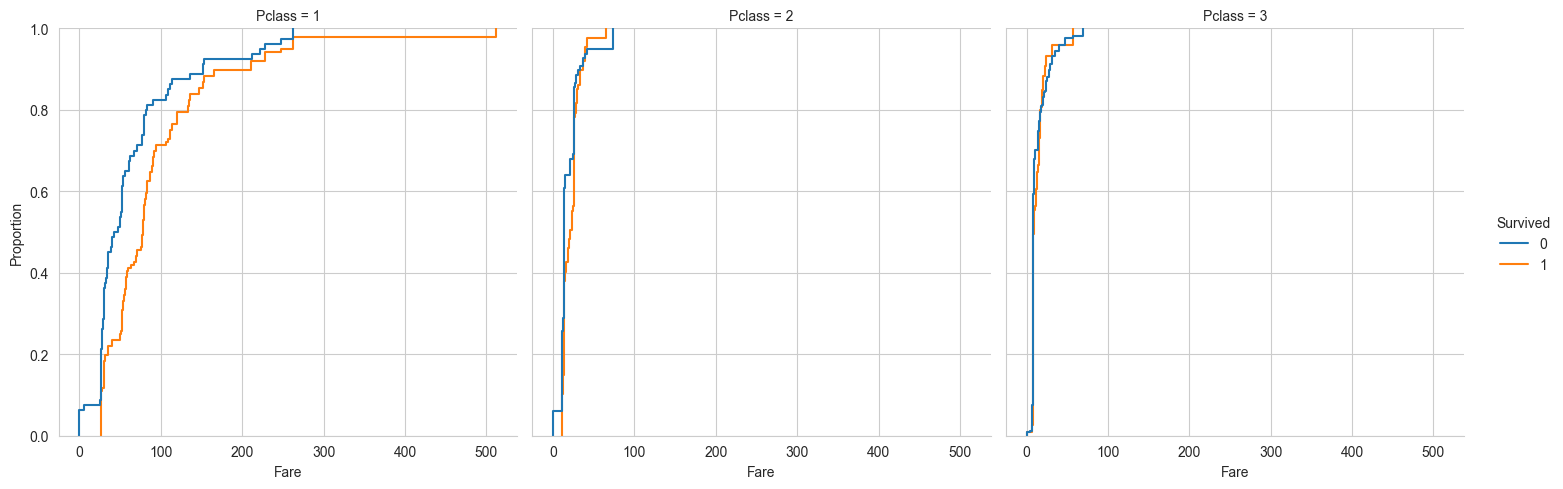

In [76]:
sns.displot(data=df_train, x="Fare", kind="ecdf", hue='Survived',col='Pclass')
# the survival rate in higher class is higher

In [77]:
df_train["FareRange"] = pd.qcut(df_train['Fare'],4)
df_train[['FareRange','Survived']].groupby(['FareRange'],as_index=False)['Survived'].mean().sort_values(by='FareRange',ascending=False)


,FareRange,Survived
3,"(31.0, 512.329]",0.581081
2,"(14.454, 31.0]",0.454955
1,"(7.91, 14.454]",0.303571
0,"(-0.001, 7.91]",0.197309


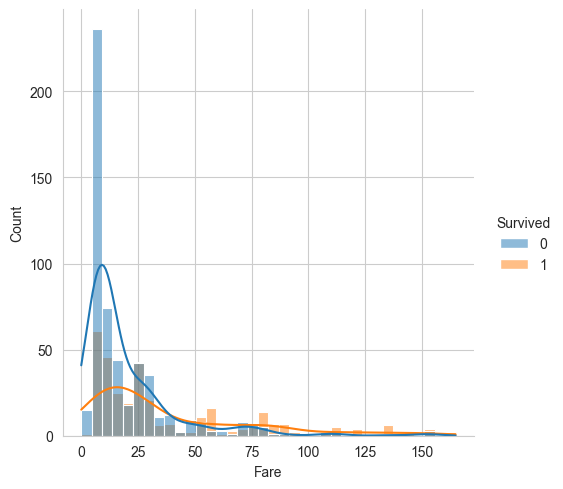

In [78]:
sns.displot(data=df_train[df_train['Fare']<180], x="Fare", kind="hist",kde=True, hue='Survived')
# After qcut processing, the distribution of Fare is uneven 
# for example, the survival probability of passengers with more than 50 is much higher than that of 30-50

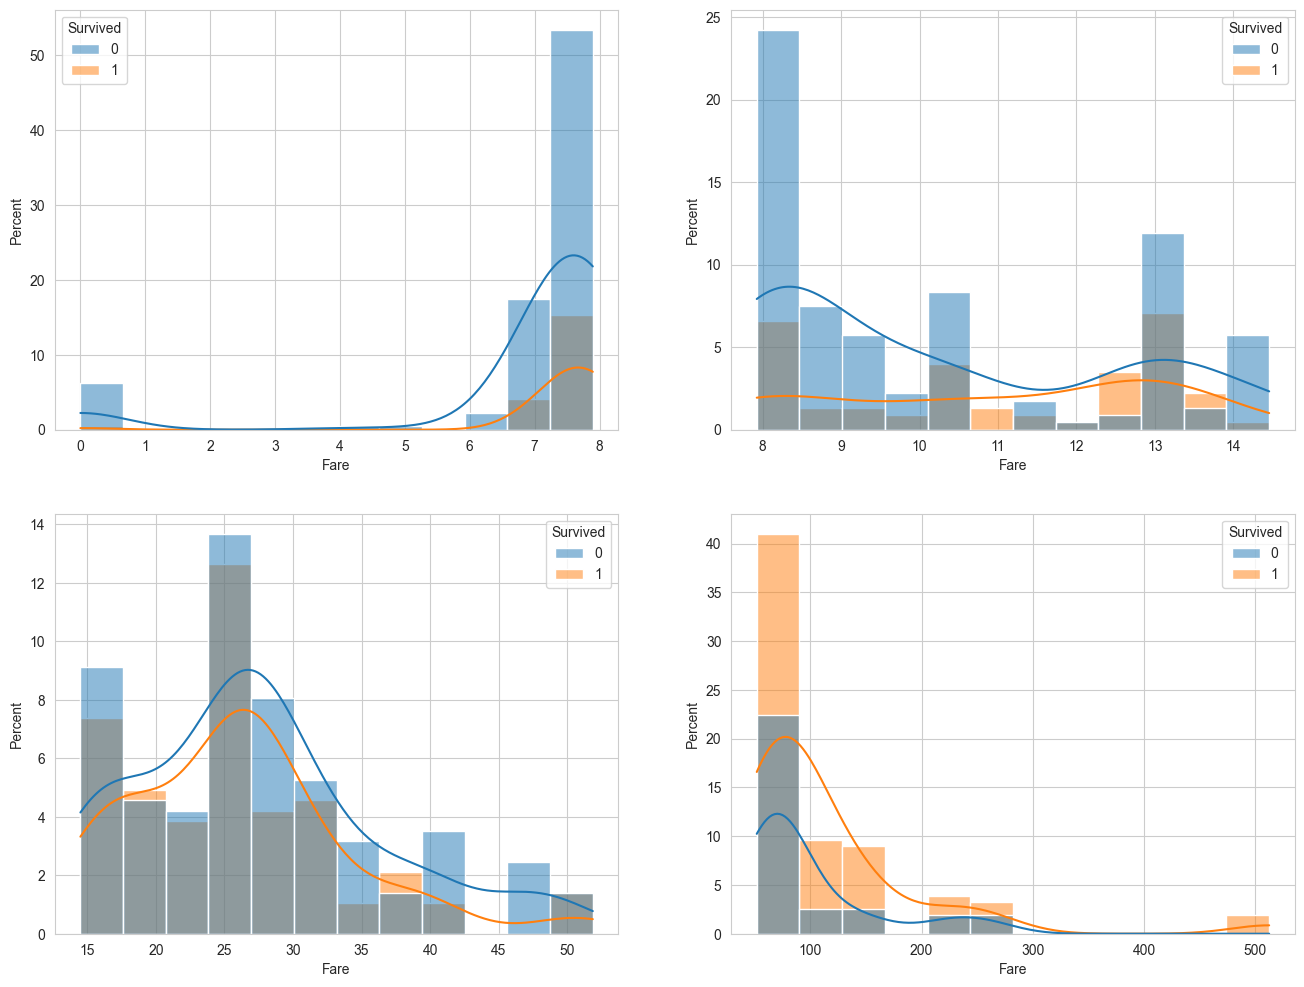

In [79]:
# Manually adjust fare groups

fig = plt.figure(figsize = (16,12))

# chart 1: survived distribution for different fare groups
sub = fig.add_subplot(2,2,1)
chart = sns.histplot(data=df_train[df_train['Fare']<7.9], x="Fare", hue="Survived",kde=True, bins=12,stat='percent')

sub = fig.add_subplot(2,2,2)
chart = sns.histplot(data=df_train[(df_train["Fare"]>=7.9) & (df_train['Fare']<14.5)], x="Fare", hue="Survived",kde=True, bins=12,stat='percent')

sub = fig.add_subplot(2,2,3)
chart = sns.histplot(data=df_train[(df_train["Fare"]>=14.5) & (df_train['Fare']<52)], x="Fare", hue="Survived",kde=True, bins=12,stat='percent')

sub = fig.add_subplot(2,2,4)
chart = sns.histplot(data=df_train[df_train["Fare"]>=52], x="Fare", hue="Survived",kde=True, bins=12,stat='percent')
plt.show()

# the survival situation of each fare group after manual adjustment is more balanced.


In [80]:
# Group Fare data
for df in data:
    df.loc[df['Fare']<7.9, 'FareGroup'] = 1
    df.loc[(df['Fare']>=7.9) & (df['Fare']<14.5), 'FareGroup'] = 2
    df.loc[(df['Fare']>=14.5) & (df['Fare']<52), 'FareGroup'] = 3
    df.loc[df['Fare']>=52, 'FareGroup'] = 4
    display(df.head())
    display(df.isnull().sum())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,AgeGroup,FareRange,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(16.336, 32.252]",2.0,"(-0.001, 7.91]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(32.252, 48.168]",3.0,"(31.0, 512.329]",4.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(16.336, 32.252]",2.0,"(7.91, 14.454]",2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(32.252, 48.168]",3.0,"(31.0, 512.329]",4.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(32.252, 48.168]",3.0,"(7.91, 14.454]",2.0


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
AgeRange       0
AgeGroup       0
FareRange      0
FareGroup      0
dtype: int64

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeGroup,FareGroup
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,Mr,3.0,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,Mrs,3.0,1.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,Mr,4.0,2.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,Mr,2.0,2.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,Mrs,2.0,2.0


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
AgeGroup       0
FareGroup      0
dtype: int64

# Family data analysis

In [81]:
# From EDA, the survival rate for passengers travelling alone is lower than with family
# in the meantime, some big family boarded Titanic with more than 5 family menbers

# check the survival rate for different family sizes
display(df_train.groupby('SibSp')['Survived'].mean())
display(df_train.groupby('Parch')['Survived'].mean())

# seems that SibSp==1/2 and Parch=1/2/3 have the higher survival rate

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [82]:
# check if there is passenger's SibSp>=2 and Parch>=2
for df in data:
    df['Family'] = df['SibSp'] + df['Parch'] +1

df_train.groupby(['Family'])['Survived'].mean()

# result shows family with 2/3/4 members has higher survival rate

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [83]:
# access more detailed family information
df_train[(df_train['Family']>1) & (df_train['Family']<5)].groupby(['SibSp','Parch'])['Survived'].mean()

# family with sibsp=2 and parch=0 has a surprisingly low survival rate.

SibSp  Parch
0      1        0.657895
       2        0.724138
       3        1.000000
1      0        0.520325
       1        0.596491
       2        0.631579
2      0        0.250000
       1        0.857143
3      0        1.000000
Name: Survived, dtype: float64

In [84]:
# check that kind of family information, the surprisingly low survival rate seems due to sex
df_train[(df_train['SibSp']==2) & (df_train['Parch']==0)].groupby('Sex')['Survived'].mean()

Sex
female    0.666667
male      0.153846
Name: Survived, dtype: float64

In [85]:
# Group Family data

for df in data:
    df.loc[df['Family']<=1, 'FamilySize'] = 'Alone'
    df.loc[(df['Family']>1) & (df['Family']<=4), 'FamilySize'] = 'Small'
    df.loc[(df['Family']>4) , 'FamilySize'] = 'Large'
   

In [86]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,AgeRange,AgeGroup,FareRange,FareGroup,Family,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,"(16.336, 32.252]",2.0,"(-0.001, 7.91]",1.0,2,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,"(32.252, 48.168]",3.0,"(31.0, 512.329]",4.0,2,Small
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,"(16.336, 32.252]",2.0,"(7.91, 14.454]",2.0,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,"(32.252, 48.168]",3.0,"(31.0, 512.329]",4.0,2,Small
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,"(32.252, 48.168]",3.0,"(7.91, 14.454]",2.0,1,Alone


# Drop useless column in processed full dataset

In [87]:
# train data drop
drop_train_list = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'AgeRange', 'FareRange', 'Family']
df_train = df_train.drop(drop_train_list, axis=1)
display(df_train.head())

,Survived,Pclass,Sex,Age,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,0,3,male,22.0,S,Mr,2.0,1.0,Small
1,1,1,female,38.0,C,Mrs,3.0,4.0,Small
2,1,3,female,26.0,S,Miss,2.0,2.0,Alone
3,1,1,female,35.0,S,Mrs,3.0,4.0,Small
4,0,3,male,35.0,S,Mr,3.0,2.0,Alone


In [88]:
df_train = df_train.drop('Age', axis=1)


In [89]:
display(df_train.head())


,Survived,Pclass,Sex,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,0,3,male,S,Mr,2.0,1.0,Small
1,1,1,female,C,Mrs,3.0,4.0,Small
2,1,3,female,S,Miss,2.0,2.0,Alone
3,1,1,female,S,Mrs,3.0,4.0,Small
4,0,3,male,S,Mr,3.0,2.0,Alone


In [90]:
# test data drop
drop_test_list = ['Name', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Family']
df_test = df_test.drop(drop_test_list, axis=1)


In [91]:
df_test = df_test.drop('Age', axis=1)

In [92]:
df_train.loc[df_train['Sex']=='female', 'Sex'] = 1
df_train.loc[df_train['Sex']=='male', 'Sex'] = 0

df_test.loc[df_test['Sex']=='female', 'Sex'] = 1
df_test.loc[df_test['Sex']=='male', 'Sex'] = 0

In [93]:
df_test.head()

,PassengerId,Pclass,Sex,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,892,3,0,Q,Mr,3.0,1.0,Alone
1,893,3,1,S,Mrs,3.0,1.0,Small
2,894,2,0,Q,Mr,4.0,2.0,Alone
3,895,3,0,S,Mr,2.0,2.0,Alone
4,896,3,1,S,Mrs,2.0,2.0,Small


In [94]:
df_train.head()

,Survived,Pclass,Sex,Embarked,Title,AgeGroup,FareGroup,FamilySize
0,0,3,0,S,Mr,2.0,1.0,Small
1,1,1,1,C,Mrs,3.0,4.0,Small
2,1,3,1,S,Miss,2.0,2.0,Alone
3,1,1,1,S,Mrs,3.0,4.0,Small
4,0,3,0,S,Mr,3.0,2.0,Alone


# Create Dummies for specific column

In [95]:
dummy_columns = ['Embarked','Title','FamilySize']
df_train_dummies = pd.get_dummies(data = df_train, columns = dummy_columns)
df_test_dummies = pd.get_dummies(data = df_test, columns = dummy_columns)
df_train_dummies.head()

,Survived,Pclass,Sex,AgeGroup,FareGroup,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize_Alone,FamilySize_Large,FamilySize_Small
0,0,3,0,2.0,1.0,0,0,1,0,0,1,0,0,0,0,1
1,1,1,1,3.0,4.0,1,0,0,0,0,0,1,0,0,0,1
2,1,3,1,2.0,2.0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,1,3.0,4.0,0,0,1,0,0,0,1,0,0,0,1
4,0,3,0,3.0,2.0,0,0,1,0,0,1,0,0,1,0,0


# Modelling

In [96]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_validate, cross_val_score, StratifiedKFold, learning_curve

import warnings
warnings.filterwarnings("ignore")

from tqdm import tqdm

In [97]:
# split data for training with specific age 
y_train = df_train_dummies['Survived']
X_train = df_train_dummies.drop('Survived', axis=1)
X_test= df_test_dummies.drop('PassengerId', axis=1)
X_train.shape, y_train.shape, X_test.shape

((891, 15), (891,), (418, 15))

In [98]:
X_train.head()

,Pclass,Sex,AgeGroup,FareGroup,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,FamilySize_Alone,FamilySize_Large,FamilySize_Small
0,3,0,2.0,1.0,0,0,1,0,0,1,0,0,0,0,1
1,1,1,3.0,4.0,1,0,0,0,0,0,1,0,0,0,1
2,3,1,2.0,2.0,0,0,1,0,1,0,0,0,1,0,0
3,1,1,3.0,4.0,0,0,1,0,0,0,1,0,0,0,1
4,3,0,3.0,2.0,0,0,1,0,0,1,0,0,1,0,0


In [100]:
random_state = 0

# Meta modelling with AdaBoostClassifier and VotingClassifier will be used later

classifiers = {
    "RF": RandomForestClassifier(random_state=random_state),
    "GBC": GradientBoostingClassifier(random_state=random_state),
    "ETC":ExtraTreesClassifier(random_state=random_state),
    "LDA": LinearDiscriminantAnalysis(),
    "LR": LogisticRegression(max_iter=1000), 
    "Pe": Perceptron(random_state=random_state), # supervised learning of binary classifiers
    "SGDC": SGDClassifier(random_state=random_state),
    "KNN": KNeighborsClassifier(), 
    "DTC": DecisionTreeClassifier(random_state=random_state),
    "MLPC": MLPClassifier(max_iter=1000),
    "SVM": SVC(random_state=random_state), # supervised learning of binary classifiers 
    "LSVC": LinearSVC(random_state=random_state),
    "GNB": GaussianNB()
}

results = pd.DataFrame(columns=["Classifier", "Avg_Accuracy"])
for name, clf in tqdm(classifiers.items()):
    model = clf
    cv_results = cross_validate(
        model, X_train, y_train, cv=10,
        scoring=(['accuracy'])
    )

    results = results.append({
        "Classifier": name,
        "Avg_Accuracy": cv_results['test_accuracy'].mean(),
    }, ignore_index=True)
    
results = results.sort_values("Avg_Accuracy", ascending=False)
results

100%|███████████████████████████████████████████| 13/13 [00:09<00:00,  1.43it/s]


,Classifier,Avg_Accuracy
10,SVM,0.832772
1,GBC,0.829426
4,LR,0.828302
3,LDA,0.826030
11,LSVC,0.824906
9,MLPC,0.821561
12,GNB,0.817066
0,RF,0.810375
8,DTC,0.805905
2,ETC,0.804782


In [109]:
# We will choose the top 3 model to tune the parameters

# SVM model tuning

SVM = SVC(probability=True)
SVM_parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
                  'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                  'kernel': ['rbf'],
                  'random_state': [0,1,2,3,42]}

SVM_grid = GridSearchCV(SVM, SVM_parameters, refit=True, scoring="accuracy", verbose=3)
SVM_grid.fit(X_train,y_train)

SVM_best = SVM_grid.best_estimator_

print(SVM_grid.best_score_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=0;, score=0.615 total time=   0.2s
[CV 2/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=0;, score=0.618 total time=   0.1s
[CV 3/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=0;, score=0.618 total time=   0.1s
[CV 4/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=0;, score=0.618 total time=   0.2s
[CV 5/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=0;, score=0.612 total time=   0.1s
[CV 1/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=1;, score=0.615 total time=   0.2s
[CV 2/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=1;, score=0.618 total time=   0.2s
[CV 3/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=1;, score=0.618 total time=   0.2s
[CV 4/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=1;, score=0.618 total time=   0.1s
[CV 5/5] END C=0.001, gamma=0.001, kernel=rbf, random_state=1;, score=0.612 total 

In [110]:
# GBC model tuning

GBC = GradientBoostingClassifier()
GBC_parameters = {'n_estimators':[5,10,50,100],
                  'max_depth':[1,3,5,7],
                  'learning_rate':[0.01,0.1,1,5],
                  'random_state': [0,1,2,3]}

GBC_grid = GridSearchCV(GBC, GBC_parameters, refit=True, scoring="accuracy", verbose=1, cv=5)
GBC_grid.fit(X_train,y_train)

GBC_best = GBC_grid.best_estimator_

print(GBC_grid.best_score_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
0.8338710689849979


In [111]:
# LR model tuning

LR = LogisticRegression()
LR_parameters = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty':['none', 'elasticnet', 'l1', 'l2'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
              'max_iter':[100,500,1000]}

LR_grid = GridSearchCV(LR, LR_parameters, refit=True, scoring="accuracy", verbose=3, cv=5)
LR_grid.fit(X_train,y_train)

LR_best = LR_grid.best_estimator_

print(LR_grid.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg;, score=0.821 total time=   0.1s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg;, score=0.809 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, solver=newton-cg;, score=0.865 total time=   0.0s
[CV 1/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs;, score=0.821 total time=   0.0s
[CV 2/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs;, score=0.820 total time=   0.0s
[CV 3/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs;, score=0.809 total time=   0.0s
[CV 4/5] END C=0.001, max_iter=100, penalty=none, solver=lbfgs;, score=0.803 total time=   0.0s
[CV 5/5] END C=0.001, max_iter=100, penalty=none, so

## Meta modelling with AdaBoostClassifier

In [112]:
# Best base estimetor for Ada is Decision tree
DTC = DecisionTreeClassifier()

ABC_dct = AdaBoostClassifier(DTC)
ABC_dct_param = {"base_estimator__criterion": ["gini", "entropy"],
                 "base_estimator__splitter": ["best", "random"],
                 "base_estimator__max_depth": [1,3,5,7],
                 "algorithm" : ["SAMME","SAMME.R"],
                 "n_estimators" : [5,10,50,100],
                 "learning_rate": [0.01,0.1,1,5]}
    
ABC_dtc_grid = GridSearchCV(ABC_dct,param_grid = ABC_dct_param, cv=5, refit= True, scoring="accuracy", verbose = 1)
ABC_dtc_grid.fit(X_train,y_train)

print(ABC_dtc_grid.best_score_, ABC_dtc_grid.best_estimator_)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits
0.8349946644906158 AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         splitter='random'),
                   learning_rate=0.01, n_estimators=100)


In [115]:
# AdaBoostClassifier (base estimetor is GBC)
ABC_gbc_param = {'n_estimators':[5,10,50,100],
                 'learning_rate':[0.01,0.1,1,5],
                 'algorithm':['SAMME','SAMME.R']}

ABC_gbc = AdaBoostClassifier(base_estimator = GBC_best)
ABC_gbc_grid = GridSearchCV(ABC_gbc, ABC_gbc_param, refit=True, scoring="accuracy", verbose=3, cv=5)
ABC_gbc_grid.fit(X_train,y_train)
print(ABC_gbc_grid.best_score_, ABC_gbc_grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=5;, score=0.855 total time=   0.5s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=5;, score=0.826 total time=   0.5s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=5;, score=0.826 total time=   0.5s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=5;, score=0.803 total time=   0.4s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=5;, score=0.843 total time=   0.5s
[CV 1/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.849 total time=   0.8s
[CV 2/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.826 total time=   0.8s
[CV 3/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.826 total time=   0.9s
[CV 4/5] END algorithm=SAMME, learning_rate=0.01, n_estimators=10;, score=0.803 total time=   0.8s
[CV 5/5] END algorithm=SAMME, learning_rate=0.01, n_

In [116]:
# AdaBoost is tree based model
# According to the above results, the fittest base estimator for Ada is GBC (best score: 0.83275)
# Set GBC as base estimator for Ada best model

Ada_best = AdaBoostClassifier(algorithm='SAMME',
                              base_estimator=DecisionTreeClassifier(max_depth=5),
                              learning_rate=0.01, n_estimators=100)


## Learning Curve plot for different models

100%|█████████████████████████████████████████████| 4/4 [00:12<00:00,  3.14s/it]


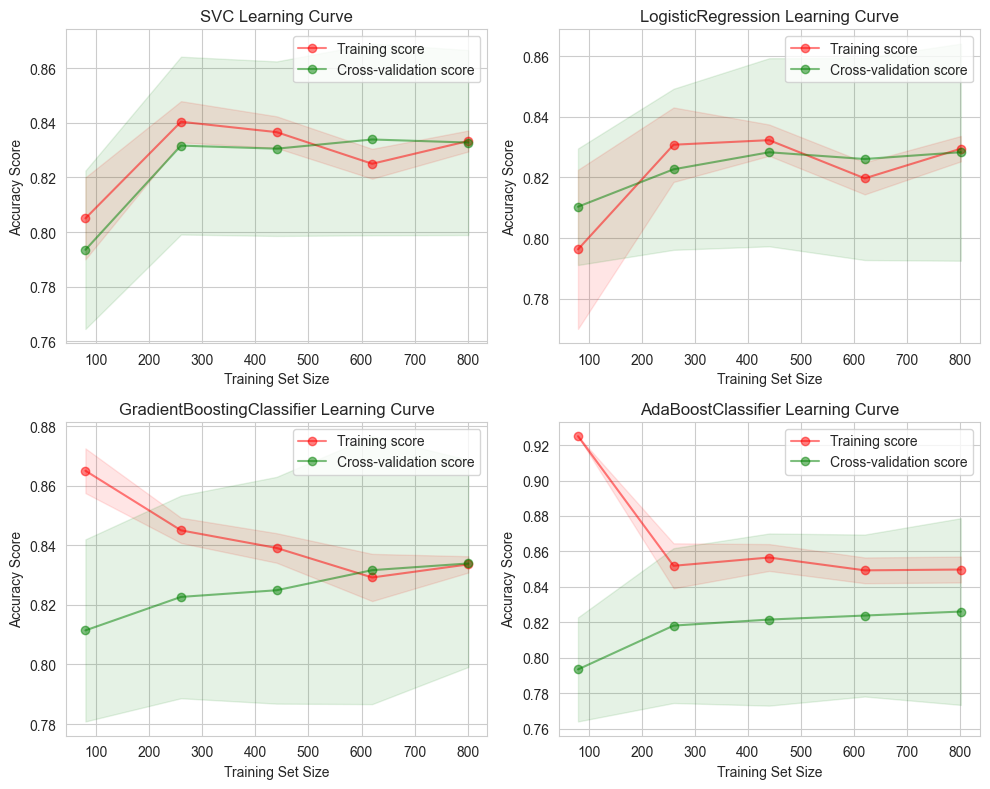

In [117]:
Best_models = {"SVC": SVM_best,
               "LogisticRegression": LR_best,
               "GradientBoostingClassifier": GBC_best,
               "AdaBoostClassifier": Ada_best}

fig = plt.figure(figsize = (10,8))
i = 1

for name, est in tqdm(Best_models.items()):
    
    train_sizes, train_scores, test_scores = learning_curve(est, X_train,y_train, cv=10, scoring='accuracy', 
                                                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
                                                        )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    sub = fig.add_subplot(2,2,i)
    plt.plot(train_sizes, train_mean, 'o-', color='r', alpha=0.5, label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color='g', alpha=0.5, label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.1)
    plt.title(name + " Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    #plt.ylim([0.72, 0.9])
    i = i+1


SVC and LR tend to overfit,
GBC and ABC perform better

# Combine models with VotingClassifier

In [118]:
# VotingClassifier
Final_voting = VotingClassifier(estimators=
                           [("SVC", SVM_best),
                            ("LogisticRegression", LR_best),
                            ("GradientBoostingClassifier", GBC_best),
                            ("AdaBoostClassifier", Ada_best)], voting='soft', n_jobs=-1, verbose=1)
             
Final_voting = Final_voting.fit(X_train,y_train)
pred_test = Final_voting.predict(X_test)

In [119]:
pred_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [121]:
ID = pd.Series(df_test_dummies['PassengerId'])
Survived = pd.Series(pred_test, name='Survived')

results = pd.concat([ID, Survived],axis=1)

results.to_csv("Titanic_predict_YijieCao2.csv",index=False)

[Voting]  (3 of 4) Processing GradientBoostingClassifier, total=   0.2s
[Voting] ...................... (1 of 4) Processing SVC, total=   0.3s
[Voting] ....... (2 of 4) Processing LogisticRegression, total=   0.0s
[Voting] ....... (4 of 4) Processing AdaBoostClassifier, total=   0.4s


In [ ]:
results.head()